Setup:
Consider the 1-d boundary value problem from fluid dynamics:
$-u''(x)+V(x)u'(x)=f(x),x \in [0,1]$ <br>
$u(0) = u(1) = 1$ <br>
and we will set: <br>
V(x) = $\gamma$ <br>
f(x) = 1

Part 1: Problem formulation: <br>
a: write this as a variational problem: $A(u,\phi)=F(\phi)$
for some test function $\phi$ <br>


$A(u,\phi) = F(\phi)$



b: Take $\phi_i$ to be the hat functions discussed in class and aproximate u as a linear combination of these basis vectors: $u(x)=\sum_i u_i \phi_i(x)$. Show that part (a) becomes a linear algebra problem of the form Ax=b.
Derive expressions for the matrix A and bector b.
Show $A_ji = A(\phi_j,\phi_i)$ and can be writte as the sum of two matrices A = A<sub>1</sub> + A<sub>2</sub> where A<sub>1</sub> and A<sub>2</sub> corresopond to the first two terms on the left hand side of the ODE

c: Implement a routine that will return A as a sparse matrix and b given n and $\gamma$

In [1]:
import MatGenerator as mg

print(mg.generateA(4,1).todense())
print(mg.generateB(4))

[[10.  -4.5  0.   0. ]
 [-5.5 10.  -4.5  0. ]
 [ 0.  -5.5 10.  -4.5]
 [ 0.   0.  -5.5 10. ]]
[[0.2]
 [0.2]
 [0.2]
 [0.2]]


Part 2: implement GMRES algorithm
signature mygmres(l,b,x0,n,M,A)
returns solution of Ax=b with initial iterate x0
n is the dimension of the problem, A is nxn, M is nxn tha defines inner product use for calculateing vector norms (and error). Github, commits from all group members

Part 3: Solving the FEM problem <br>
use GMRES to solve for cases V(x) = 1 and V(x) = n+1 <br>
using M as the identity matrix. for each case, run with n=12,32,64,128 and l=2,4,8,16,32,64, increasing l until the error (norm of residual divided by n) is below 10<sup>-6</sup><br>
plot the most accurate solution (as a function of x) as well as the error vs functions of n and l

[[0.02356831]
 [0.04499993]
 [0.06416538]
 [0.08092731]
 [0.09514006]
 [0.10664912]
 [0.11529063]
 [0.12089081]
 [0.12326534]
 [0.12221871]
 [0.11754358]
 [0.10902006]
 [0.09641489]
 [0.07948072]
 [0.05795516]
 [0.03155997]]


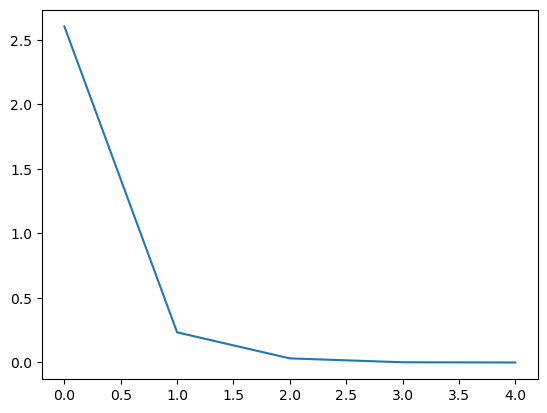

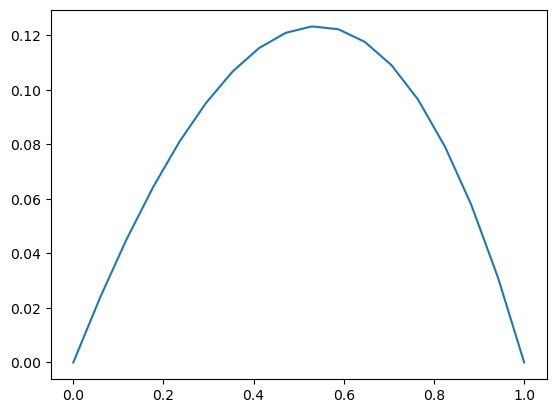

In [23]:
import MatGenerator as mg
n=16
A = mg.generateA(n,1.)
B = mg.generateB(n)
import GMRES as GM
from importlib import reload
reload(GM)
import numpy as np

alg = GM.gmres()
x0 = np.zeros((n,1))
x0[5,0] = 1
x = alg.mygmres(n,B, x0,n,np.eye(n),A)
err = alg.errors

import matplotlib.pyplot as plt
plt.figure()
plt.plot(err)
print(alg.best_x)

plt.figure()
x,y = alg.sol_to_xy()
plt.plot(x,y)
